<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Redes-neuronales" data-toc-modified-id="Redes-neuronales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Redes neuronales</a></span><ul class="toc-item"><li><span><a href="#Entendimiento-de-los-datos" data-toc-modified-id="Entendimiento-de-los-datos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Entendimiento de los datos</a></span></li><li><span><a href="#Pretratamiento" data-toc-modified-id="Pretratamiento-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pretratamiento</a></span></li><li><span><a href="#Modelamiento" data-toc-modified-id="Modelamiento-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Modelamiento</a></span><ul class="toc-item"><li><span><a href="#activation" data-toc-modified-id="activation-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>activation</a></span></li><li><span><a href="#max_iter" data-toc-modified-id="max_iter-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>max_iter</a></span></li><li><span><a href="#hidden_layer_sizes" data-toc-modified-id="hidden_layer_sizes-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>hidden_layer_sizes</a></span></li><li><span><a href="#learning_rate_init" data-toc-modified-id="learning_rate_init-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>learning_rate_init</a></span></li><li><span><a href="#mejor-combinación" data-toc-modified-id="mejor-combinación-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>mejor combinación</a></span></li><li><span><a href="#DESDE-AQUÍ:-NO-EJECUTAR-DE-NUEVO-(+20-minutos)" data-toc-modified-id="DESDE-AQUÍ:-NO-EJECUTAR-DE-NUEVO-(+20-minutos)-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span><font color="red"><b>DESDE AQUÍ: NO EJECUTAR DE NUEVO (+20 minutos)</b></font></a></span></li><li><span><a href="#HASTA-ACÁ-(+20-minutos)" data-toc-modified-id="HASTA-ACÁ-(+20-minutos)-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span><font color="red"><b>HASTA ACÁ (+20 minutos)</b></font></a></span></li></ul></li></ul></li></ul></div>

# Redes neuronales

Vamos a crear un modelo de clasificación de cancer de seno con una sencilla red neuronal.

In [1]:
import numpy as np
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V
from sklearn.model_selection import GridSearchCV #permite buscar la mejor configuración de parámetros con C-V
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
from sklearn.metrics import make_scorer # permite crear una clase scorer a partir de una función de score (necesario para el kappa)
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

## Entendimiento de los datos

In [2]:
cancer = load_breast_cancer()

In [3]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Tenemos un baseline que clasifica en maligno, con 357 instancias benignas vs 212 malignas (62.7%)

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
data = pd.DataFrame(cancer.data)
data.columns = cancer.feature_names

In [7]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Vemos que no hay missing values, y que todas las variables independientes con numéricas.
Creamos los datasets de training y de test.

In [8]:
X = cancer['data']
y = cancer['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [10]:
df_X_train = pd.DataFrame(X_train, columns=cancer.feature_names)
df_y_train = pd.DataFrame(y_train, columns=['target'])
df_X_test = pd.DataFrame(X_test, columns=cancer.feature_names)
df_y_test = pd.DataFrame(y_test, columns=['target'])

In [11]:
print(f"Train: {df_X_train.shape}, {df_y_train.shape}")
print(f"Test: {df_X_test.shape}, {df_y_test.shape}")

Train: (426, 30), (426, 1)
Test: (143, 30), (143, 1)


## Pretratamiento


Normalizar **no es necesario ni para las redes neuronales** desde el punto de vista que, como con la **regresión logística**, no cambia las capacidades predictivas del modelo, solo la magnitud de los coeficientes y su posible interpretación (en regresión logística, ya que en redes neuronales no es posible pensar en términos de inferencia).

Sin embargo, normalizar es una buena práctica en el sentido de que puede mejorar el número de épocas de entrenamiento necesarias, y se puede llegar a convertir en una práctica obligatoria en el caso de redes muy profundas, sobre las cuales el **gradiente** del error propagado puede **saturarse** o **desvanecerse**.

Creamos entonces un objeto escalador que aprende a transformar datos solo con respecto a los datos de entrenamiento, ya que en teoría no se conocen los de test en el momento del aprendizaje.
Se aplica luego la transformación a ambos conjuntos (train y test).

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelamiento

Con una regresión logística nos habría ido así:

In [14]:
np.random.seed(1234)
logreg = LogisticRegression(random_state=1, solver='lbfgs')
logreg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [15]:
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9790209790209791 , Kappa: 0.9548563611491108 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [16]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1])

Con una red neuronal multi-capas obtenemos:

In [17]:
mlp = MLPClassifier()

In [18]:
np.random.seed(1234)
mlp = MLPClassifier(hidden_layer_sizes=(10,15,20), random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter=500, random_state=1)

input, 1 hidden    : 30 * (10) + 10
1 hidden, 2 hidden : 10 * (15) + 15
2 hidden, 3 hidden : 15 * (20) + 20
3 hidden , output  : 20 * (1)  + 1

In [19]:
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9790209790209791 , Kappa: 0.9552051790748669 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



<font color = "red">Encuentre la mejor red neuronal utilizando **GridSearchCV**, buscando la mejor combinación de los parámetros siguientes:</font>
* <font color = "red">**activation**: función de activación, a escoger entre 'logistic', 'tanh', 'relu' (valor por defecto)</font>
* <font color = "red">**max_iter**: máximo número de épocas de entrenamiento (por defecto, 200). Puede que no se necesiten todas las especificadas si se llega a convergencia).</font>
* <font color = "red">**hidden_layer_sizes**: topología de la red, vector indicando el número de neuronas por capa. Por defecto solo se tiene un capa escondidad con 100 neuronas: (100).</font>
* <font color = "red">**learning_rate_init**: tasa de aprendizaje inicial (por defecto es constante aunque se puede modificar esta tasa a medida que se va avanzando en el número de épocas). Por defecto, el valor es 0.001. </font>

In [20]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05]

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

### activation

In [22]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1)

In [23]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}%".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'logistic'}, que permiten obtener un Accuracy de 96.95% y un Kappa del 93.44%
Tiempo total: 0.07 minutos


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
df = pd.DataFrame([(activation, acc*100, kappa*100) for (activation, acc, kappa) in
                   zip(activation_vec,
                       grid.cv_results_['mean_test_accuracy'],
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('activation', 'Accuracy', 'Kappa'))

In [ ]:
df

,activation,Accuracy,Kappa
0,logistic,97.414501,94.427192
1,relu,97.179207,93.831084
2,tanh,96.943912,93.410066


In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.972027972027972 , Kappa: 0.9405405405405405 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        56
           1       0.96      1.00      0.98        87

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
grid.best_estimator_

MLPClassifier(activation='logistic', hidden_layer_sizes=(30, 30, 30))

### max_iter

In [13]:
import time

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'max_iter':max_iter_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'max_iter': 300}, que permiten obtener un Accuracy de 97.89% y un Kappa del 95.44
Tiempo total: 0.05 minutos


In [ ]:
df = pd.DataFrame([(max_iter, acc*100, kappa*100) for (max_iter, acc, kappa) in
                   zip(max_iter_vec,
                       grid.cv_results_['mean_test_accuracy'],
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('max_iter', 'Accuracy', 'Kappa'))

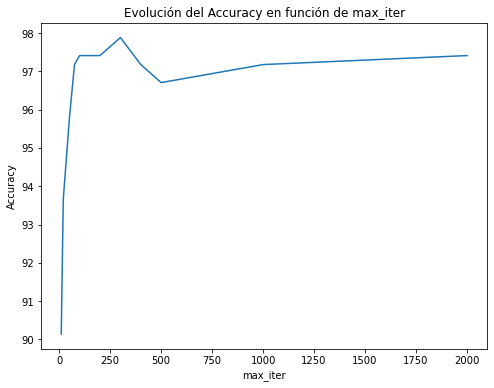

In [ ]:
plt.figure(figsize=(8,6))
ax = plt.gca() # get current axis
plt.plot(df.max_iter, df.Accuracy)
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.title('Evolución del Accuracy en función de max_iter')
plt.show()

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.965034965034965 , Kappa: 0.9259144130141954 

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        56
           1       0.96      0.99      0.97        87

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



### hidden_layer_sizes

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'hidden_layer_sizes':hidden_layer_sizes_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'hidden_layer_sizes': (30,)}, que permiten obtener un Accuracy de 97.65% y un Kappa del 94.95
Tiempo total: 0.04 minutos


C:\Install\Miniconda\envs\tfgpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
df = pd.DataFrame([(hidden_layer_sizes, acc*100, kappa*100) for (hidden_layer_sizes, acc, kappa) in
                   zip(hidden_layer_sizes_vec,
                       grid.cv_results_['mean_test_accuracy'],
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('hidden_layer_sizes', 'Accuracy', 'Kappa'))

In [ ]:
df

,hidden_layer_sizes,Accuracy,Kappa
0,"(10,)",97.417237,94.452011
1,"(20,)",96.711354,92.868408
2,"(30,)",97.649795,94.946318
3,"(10, 10)",96.714090,92.879858
4,"(20, 20)",97.417237,94.409563
5,"(30, 30)",97.414501,94.378437
6,"(20, 10)",97.181943,93.905310
7,"(30, 20, 10)",97.179207,93.909565


In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9790209790209791 , Kappa: 0.9555486478085172 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.97      1.00      0.98        87

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



### learning_rate_init

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'learning_rate_init':learning_rate_init_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'learning_rate_init': 0.004}, que permiten obtener un Accuracy de 97.65% y un Kappa del 94.88
Tiempo total: 0.03 minutos


In [ ]:
df = pd.DataFrame([(learning_rate_init, acc*100, kappa*100) for (learning_rate_init, acc, kappa) in
                   zip(learning_rate_init_vec,
                       grid.cv_results_['mean_test_accuracy'],
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('learning_rate_init', 'Accuracy', 'Kappa'))

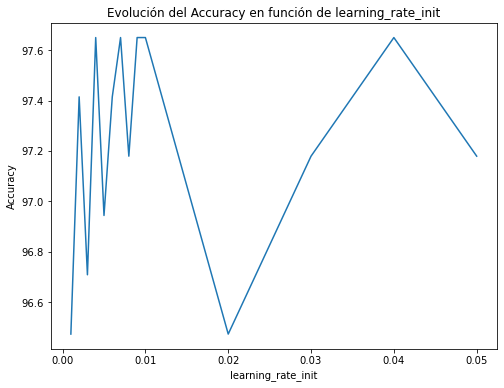

In [ ]:
plt.figure(figsize=(8,6))
ax = plt.gca() # get current axis
plt.plot(df.learning_rate_init, df.Accuracy)
plt.xlabel('learning_rate_init')
plt.ylabel('Accuracy')
plt.title('Evolución del Accuracy en función de learning_rate_init')
plt.show()

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.972027972027972 , Kappa: 0.9405405405405405 

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        56
           1       0.96      1.00      0.98        87

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



### mejor combinación

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10),
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1)

#### <font color="red"><b>DESDE AQUÍ: NO EJECUTAR DE NUEVO (+20 minutos)</b></font>

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001, 'max_iter': 400}, que permiten obtener un Accuracy de 98.59% y un Kappa del 96.97
Tiempo total: 9.16 minutos


C:\Install\Miniconda\envs\tfgpu\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


#### <font color="red"><b>HASTA ACÁ (+20 minutos)</b></font>

In [ ]:
df = pd.DataFrame([(acc*100, kappa*100) for (acc, kappa) in
                   zip(
                       grid.cv_results_['mean_test_accuracy'],
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Accuracy', 'Kappa'))

In [ ]:
df.iloc[np.argsort(-df.Accuracy),]

,Accuracy,Kappa
79,98.593707,96.980305
7,98.593707,96.966494
1225,98.590971,96.928195
128,98.590971,96.928195
369,98.590971,96.928195
...,...,...
726,57.969904,0.000000
484,57.969904,0.000000
1210,57.969904,0.000000
968,42.030096,0.000000


In [ ]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_activation', 'param_hidden_layer_sizes', 'param_learning_rate_init', 'param_max_iter', 'params', 'split0_test_kappa', 'split1_test_kappa', 'split2_test_kappa', 'split3_test_kappa', 'split4_test_kappa', 'mean_test_kappa', 'std_test_kappa', 'rank_test_kappa', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'])

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), ", Kappa:", cohen_kappa_score(y_test, y_pred), "\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9790209790209791 , Kappa: 0.9555486478085172 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.97      1.00      0.98        87

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
df = pd.DataFrame([(act, hidden_layers, lr, max_iter, acc*100, kappa*100) for (act, hidden_layers, lr, max_iter, acc, kappa) in
                   zip(
                       grid.cv_results_['param_activation'],
                       grid.cv_results_['param_hidden_layer_sizes'],
                       grid.cv_results_['param_learning_rate_init'],
                       grid.cv_results_['param_max_iter'],
                       grid.cv_results_['mean_test_accuracy'],
                       grid.cv_results_['mean_test_kappa'],
                      )
                   ], columns = ('Activation', 'HiddenLayers', 'LearningRate', 'MaxIter', 'Accuracy', 'Kappa'))

In [ ]:
df.iloc[np.argsort(-df.Accuracy),].head(20)

,Activation,HiddenLayers,LearningRate,MaxIter,Accuracy,Kappa
79,logistic,"(10,)",0.008,50,98.593707,96.980305
7,logistic,"(10,)",0.001,400,98.593707,96.966494
1225,logistic,"(30, 20, 10)",0.002,100,98.590971,96.928195
128,logistic,"(20,)",0.001,400,98.590971,96.928195
369,logistic,"(10, 10)",0.001,300,98.590971,96.928195
1487,relu,"(20,)",0.004,50,98.590971,96.928195
2357,relu,"(20, 20, 20)",0.006,75,98.590971,96.906373
2537,relu,"(30, 30, 30)",0.020,400,98.590971,96.949614
1926,relu,"(20, 20)",0.020,20,98.590971,96.963378
1458,relu,"(20,)",0.001,300,98.358413,96.455215


# Búsqueda de parámetros con optimización bayesiana

La optimización de los hiper parámetros la podemos hacer de varias maneras:
- Grid search: lo que hemos hecho hasta ahora
- Random search: escoger combinaciones de valores al azar dentro de un rango determinado para cada hiperparámetro de manera independiente
- Optimización bayesiana: modelo de búsqueda "inteligente"


La **optimización bayesiana** se basa en la maximización de una métrica, dado una configuración de hiperparámetros óptima.
El paquete que vamos a utilizar es muy sencillo, y requiere la creación de una función "caja negra" que:
- recibe como argumentos los hiperparámetros del flujo de modelo a calibrar
- retorna una métrica que se quiere maximizar (e.g. el ROC AUC, el accuracy, etc.)

In [63]:
!pip install bayesian-optimization
#conda install -c conda-forge bayesian-optimization

Vamos a crear una función de ploteo que nos permita visualizar los avances. Esta función va a recibir un diccionario de datos y va a iterar sobre él, mostrando los resultados. Esta función se podrá llamar cada iteración de la búsqueda de hiperparámetros en el proceso de optimización bayesiana.

In [15]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title='', win_size: int = 100):
    """
    Función para mostrar en tiempo real el progreso de la optmización bayesiana.
    """
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        if len(data) > win_size:
            data = data[-win_size:]
            iterations = np.arange(len(data))[-win_size:]
        else:
            iterations = np.arange(len(data))
        plt.plot(iterations, data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Iteration')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

## Función de "caja negra" a optimizar

Creamos una función de "caja negra", encargada de entrenar un flujo del modelo que incluya un pretratamiento de las variables independientes (e.g. estandarización, imputación, etc.) y un modelo de clasificación con los hiperparámetros a testear.

Esta función se llamará varias veces con diferentes valores de los hiper parámetros del flujo de entrenamiento, buscando la maximización del valor que ella retorna. El proceso de esta búsqueda lo hará la librería, una vez definamos la función de caja negra y los rangos de los valores posibles de los hiper parámetros.

En este caso en particular, todas las variables son numéricas y continuas, sin embargo, para ilustrar un proceso en el que combinamos variables numéricas con categóricas, incluiremos en los flujos de entrenamiento ejemplos de  pretratamientos que deberíamos considerar en ambos casos.

La optimización bayesiana supone que todos los hiper parámetros son numéricos y contínuos, por lo que para algunos de ellos que no lo son, nos tocará ser un poco creativos. A continuación explicamos como trataremos algunos de ellos.


### Arquitectura de la red

En el caso de un flujo que incluya una red neuronal, los hiper parámetros que definen la arquitectura de la red neuronal deben tener un tratamiento muy particular. No solo tenemos que buscar el número de capas escondidas, sino el número de neuronas de ellas.

Vamos a partir de una arquitectura típica en que las primeras capas escondidas tienen mas neuronas que las siguientes. Para simplificar definimos un único hiper parámetro `model_hidden_layer_size_exp` que define toda la arquitectura. Su valor, después de convertido a entero, definirá una potencia de 2 que indicará el número de neuronas de la primera capa escondida.

Por ejemplo, si este número es 5, la primera capa escondida tendrá 2^5=32 neuronas, la siguiente capa tendrá 2^4=16 neuronas, y así sucesivamente. Establecemos un límite de 2^2=4 neuronas para la última capa escondida, teniendo en cuenta que la capa de salida en estas redes tradicionales tiene siempre una única neurona. Si el valor de este hiper parámetro es inferior a 2, se definirá una única capa de 4 neuronas.
En código establecemos entonces la arquitectura de la siguiente manera.

In [21]:
# Este será el hiper parámetro que se definirá a través de la librería, establecemos un valor de prueba
model_hidden_layer_size_exp=5.2
max_exponent = int(model_hidden_layer_size_exp)
# Se crea una lista con los valores de las potencias de 2 de la mayor a la menor (reversada)
hidden_layer_sizes = [2**(n) for n in reversed(range(2, max_exponent+1))]
print(f"max_exponent: {max_exponent}")
print(f"arquitectura: {hidden_layer_sizes}")

max_exponent: 5
arquitectura: [32, 16, 8, 4]


In [22]:
_ = [print(n) for n in reversed(range(2, max_exponent+1))]

5
4
3
2


### Hiper parámetros del back propagation del modelo de red neuronal tradicional

El proceso de entrenamiento por back-propagation de la red neuronal requiere la definición de los siguientes hiper parámetros:
- `model_lr_init`: learning rate a utilizar que controla la velocidad de las actualizaciones de los parámetros de la red
- `model_alpha`: controla el nivel de regularización Ridge (L2) de las neuronas
- `model_batch_size`: controla el tamaño del batch en el proceso de mini-batch gradient descent, también se define en términos de potencias de 2. Por ejemplo, un valor de 10.1 se convertirá en entero (10), y luego se tomará 2^10=1024 como tamaño del batch,
- `model_max_iter`: define el número de épocas de iteración que se aplicarán en el entrenamiento

### Imputación de datos faltantes

No hay que olvidar que estamos buscando los mejores hiper parámetros del proceso, no solo del modelo. Las redes neuronales no aceptan valores faltantes, por lo que hay que definir la estrategia de imputación.
Podemos pensar en dos maneras de imputar (pueden ser muchas mas): una que involucre el `SimpleImputer` remplazando el valor faltante por el promedio o mediana, otra que utilice el `KNNImputer` remplazando el valor faltante por el promedio o mediana de sus `K` vecinos mas cercanos.

Definimos los siguientes hiper parámetros de imputación:
- `imputer_strategy`: recibe un valor entre 0 y 1, si es inferior a 0.5 se utilizará el promedio, sino, se utilizará la mediana
- `imputer_class`: recibe un valor entre 0 y 1, si es inferior a 0.5 se utilizará el `SimpleImputer`, y para valores superiores a 0.5, se utilizará el `KNNImputer`.
- `knn_imputer_k`: en el caso de utilizar un `KNNImputer` se necesitará definir ademas otro hiper parámetro que establecerá el número de vecinos cercanos a considerar y que no tendra incidencia en el caso de `SimpleImputer`.

### Método de normalización

Similar al caso anterior en el hecho de que se refiere a un pretratamiento de datos, definimos un hiper parámetro `scaler_choice` que controlará la normalización de los datos de entrada al modelo. Si su valor es inferior a 0.5 se escala, si es superior, se normaliza entre 0 y 1.

### Tratamiento de variables categóricas

Las variables categóricas deberán ser codificadas; en este caso utilizaremos `OneHotEncoder` para tal efecto.
No definimos un hiper parámetro para este efecto, aunque podríamos considerar otros métodos de codificación como por ejemplo, **embeddings** (lo veremos en las sesiones de tratamiento de texto)

## Función de caja negra (la llamaremos `train_and_evaluate`)

Escribimos el código de la función de caja negra teniendo en cuenta lo mencionado antes.

Como lo hemos mencionado, el dataset es sencillo y no incluye variables categóricas.

In [27]:
var_numericas = cancer.feature_names
var_categoricas = []

In [28]:
X_train.shape

(426, 30)

In [29]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from pprint import pprint
import collections

# Se crea un diccionario donde todos los valores son listas, de tal manera
# que sea fácil agregar nuevos valores de las métricas de seguimiento
# cada vez que se realice una iteración de entrenamiento, para poder ser
# graficadas con la función `live_plot`
data_plot = collections.defaultdict(list)

def add_model(data_pipeline, model) -> Pipeline:
    whole_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("model", model)
    ])
    return whole_pipeline

La función `train_and_evaluate` que creamos a continuación contiene el proceso de pretratamiento de la data, de entrenamiento del flujo del modelo y de evaluación con la métrica a optimizar.

La vamos a "empacar" con una función wrapper mas adelante.
De esta manera podremos definir argumentos que no sean hiperparámetros del flujo, como lo son `verbose`, que indica si se quiere indagar mas sobre el desarrollo del proceso, y `show_live_plot`, que indica si se quiere imprimir un plot con los resultados parciales de cada iteración en tiempo real.

Además la función retorna tanto el modelo como la métrica que se desea optimizar; el proceso de optimización bayesiana del paquete que estamos utilizando requiere que solo se retorne un valor, que es lo que hará la función wrapper.

In [30]:
def train_and_evaluate(
    #------------------------------------------
    # Hiperparámetros de tratamiento de datos
    #------------------------------------------

    # Escala de los datos: vamos a escoger entre un MinMax y una estandarización
    scaler_choice, # si <0.5: se estandariza, si >0.5: se normaliza entre 0 y 1

    # Imputación: vamos a escoger entre un SimpleScaler y un KNNImputer
    imputer_strategy, # si <0.5: se usa el promedio, si >0.5: se usa la mediana
    imputer_class,    # si <0.5: se usa SimpleImputer, si >0.5: se usa KNNImputer
    knn_imputer_k,    # hiperparámetro del KNNImputer

    #------------------------------------------
    # Hiperparámetros del modelo y de su entrenamiento
    #------------------------------------------

    # Model
    model_hidden_layer_size_exp, #controla el número de neuronas y de capas
    model_lr_init, #learning rate
    model_alpha,
    model_batch_size,
    model_max_iter,
    verbose=0,
    show_live_plot=True
) -> float: #Retorna un valor float

    #----------------------------------------------
    #--- Definición de tareas de pretratamiento ---
    #----------------------------------------------

    scaler_cls = StandardScaler if scaler_choice > 0.5 else MinMaxScaler
    imputer_strategy = "mean" if imputer_strategy > 0.5 else "median"
    if imputer_class > 0.5:
        imputer = KNNImputer(n_neighbors=int(knn_imputer_k))
    else:
        imputer = SimpleImputer(strategy=imputer_strategy)

    # Para las variables numéricas definimos un pipeline que impute
    # valores faltantes, y luego normalice
    numeric_transformer = Pipeline(
        steps=[("imputer", imputer), ("scaler", scaler_cls())]
    )

    # Para las variables categóricas definimos un column transformer
    # que traduzca las categorías a variables one hot encoded
    categorical_transformer = OneHotEncoder(handle_unknown="ignore")

    # Creamos un Column Transformer con las tareas de preprocesamiento
    # específicas a los dos tipos de variables
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, var_numericas),
            ("cat", categorical_transformer, var_categoricas),
        ]
    )

    # El pipeline se crea con un primer paso de pretratamiento. Mas adelante
    # se le agregará el paso del modelo.
    data_pipeline = Pipeline(steps=[
        ("data_processor", preprocessor),
    ])

    #---------------------------------
    #--- Configuración del modelo  ---
    #---------------------------------

    max_exponent = int(model_hidden_layer_size_exp)
    if max_exponent<2:
        max_exponent=2

    model_kwargs = dict(
        hidden_layer_sizes = [2**(n) for n in reversed(range(2, max_exponent+1))],
        batch_size=2**int(model_batch_size),
        learning_rate_init=model_lr_init,
        alpha=model_alpha,
        max_iter=int(model_max_iter),
        early_stopping=True,
        random_state=42,
    )

    if verbose:
        print("MLP Classifier params: ")
        pprint(model_kwargs)

    model = MLPClassifier(**model_kwargs)

    pipeline = add_model(data_pipeline, model)

    #------------------------------------------------
    #--- Protocolo de entrenamiento y evaluación  ---
    #------------------------------------------------

    # Seguiremos un K-fold con 3 splits aleatorios
    kf = KFold(n_splits=3, random_state=42, shuffle=True)

    # para cada fold guardamos las métricas del training y validation set
    train_fold_metrics = []
    val_fold_metrics = []

    # K-Fold cross val
    for i, (train_index, test_index) in enumerate(kf.split(df_X_train)):
        #print(f"Fold number: {i+1}")
        kX_train, kX_val = df_X_train.iloc[train_index], df_X_train.iloc[test_index]
        ky_train, ky_val = df_y_train.iloc[train_index], df_y_train.iloc[test_index]
        #print(f"Training with {kX_train.shape}")
        #print(f"Validating with {kX_val.shape}")
        pipeline.fit(kX_train, ky_train.squeeze())

        train_preds = (pipeline.predict_proba(kX_train)[:, 1]> 0.5)
        train_metric = accuracy_score(ky_train.squeeze(), train_preds)
        train_fold_metrics.append(train_metric)

        val_preds = (pipeline.predict_proba(kX_val)[:, 1]> 0.5)
        val_metric = accuracy_score(ky_val.squeeze(), val_preds)
        val_fold_metrics.append(val_metric)

    train_metric_mean = np.array(train_fold_metrics).mean()
    val_metric_mean = np.array(val_fold_metrics).mean()

    if show_live_plot:
        data_plot['train_metric'].append(train_metric_mean)
        data_plot['val_metric'].append(val_metric_mean)
        live_plot(data_plot)

    return pipeline, val_metric_mean

La función `target_func` va a "empacar" la función `train_and_evaluate`, conformándose a lo esperado por el paquete de optimización bayesiana.

In [31]:
def target_func(**kwargs):
    model, result = train_and_evaluate(**kwargs)
    return result

Ahora que hemos creado la función de caja negra la podemos llamar directamente

In [40]:
flujo_de_modelo, metric = train_and_evaluate(
    scaler_choice=0.3, # si <0.5: se estandariza, si >0.5: se normaliza entre 0 y 1
    imputer_strategy=0.3, # si <0.5: se usa el promedio, si >0.5: se usa la mediana
    imputer_class=0.3,    # si <0.5: se usa SimpleImputer, si >0.5: se usa KNNImputer
    knn_imputer_k=0,      # hiperparámetro del KNNImputer
    model_hidden_layer_size_exp=3, #controla el número de neuronas y de capas
    model_lr_init=0.01,
    model_alpha=0.01,
    model_batch_size=6,
    model_max_iter=50,
    verbose=1,
    show_live_plot=False
)

MLP Classifier params: 
{'alpha': 0.01,
 'batch_size': 64,
 'early_stopping': True,
 'hidden_layer_sizes': [8, 4],
 'learning_rate_init': 0.01,
 'max_iter': 50,
 'random_state': 42}


Podemos ver que por cada llamado, se agrega un valor a las métricas de seguimiento que vamos a plotear.

In [41]:
data_plot

defaultdict(list,
            {'train_metric': [0.9413145539906104,
              0.8262910798122065,
              0.6431924882629109,
              0.971830985915493,
              0.9636150234741785,
              0.9248826291079811,
              0.9647887323943661,
              0.8368544600938966,
              0.943661971830986,
              0.6431924882629109,
              0.8368544600938969,
              0.9612676056338029,
              0.6431924882629109,
              0.9471830985915494,
              0.9507042253521126,
              0.9413145539906104,
              0.8931924882629109,
              0.9577464788732395,
              0.9589201877934271,
              0.9295774647887324,
              0.9589201877934271,
              0.9741784037558686,
              0.9624413145539906,
              0.8943661971830986,
              0.9401408450704225,
              0.9741784037558686,
              0.8556338028169015,
              0.556338028169014,
              0.9

Se debe crear una instancia de **BayesianOptimization**, especificando la función a optimizar, los hiperparámetros y sus dominios de búsqueda de valores, de donde se tomarán las configuraciones a evaluar.

In [44]:
from bayes_opt import BayesianOptimization

Definimos los intervalos sobre los cuáles se va a realizar la búsqueda para cada hiper parámetro

In [45]:
pbounds = {'scaler_choice': (0, 1), 'imputer_strategy': (0, 1), 'imputer_class': (0, 1), 'knn_imputer_k': (1,16),
           'model_hidden_layer_size_exp': (2, 5), 'model_lr_init': (0.005, 0.5), 'model_alpha': (0.001, 1),
           'model_batch_size':(3, 7), 'model_max_iter':(50,50)}

Creamos el optimizador bayesiano, especificando la función caja negra a maximizar y la configuración de hiper parámetros

In [46]:
data_plot = collections.defaultdict(list)

In [47]:
optimizer = BayesianOptimization(
    f=target_func,
    pbounds=pbounds,
    random_state=42,
    verbose=2,
)

Si se quiere empezar por una configuración en particular, se pueden programar antes de lanzar la búsqueda automática:

In [48]:
optimizer.probe(
    params={'scaler_choice': 0.3, 'imputer_strategy': 0.3, 'imputer_class': 0.3, 'knn_imputer_k': 1,
            'model_hidden_layer_size_exp': 3, 'model_lr_init': 0.01, 'model_alpha': 0.01, 'model_batch_size': 6, 'model_max_iter': 50}, lazy=True)
optimizer.probe(
    params={'scaler_choice': 0.3, 'imputer_strategy': 0.3, 'imputer_class': 0.3, 'knn_imputer_k': 1,
            'model_hidden_layer_size_exp': 2, 'model_lr_init': 0.1, 'model_alpha': 0.01, 'model_batch_size': 6, 'model_max_iter': 50}, lazy=True)
optimizer.probe(
    params={'scaler_choice': 0.3, 'imputer_strategy': 0.3, 'imputer_class': 0.3, 'knn_imputer_k': 1,
            'model_hidden_layer_size_exp': 4, 'model_lr_init': 0.05, 'model_alpha': 0.01, 'model_batch_size': 6, 'model_max_iter': 50}, lazy=True)

Se puede utilizar directamente el objeto de **BayesianOptimization**, usando su método **maximize** que optimiza la función definida. Entre los parámetros de este método los más importante son:

- init_points: el número de pasos de exploración aleatorios a ejecutar para incializar el proceso gausiano.
- n_iter: el número de iteraciones del proceso gausiano de búsqueda de configuraciones de hiperparámetros. A mayor número de pasos, mejor la maximización, pero mas largo el proceso.

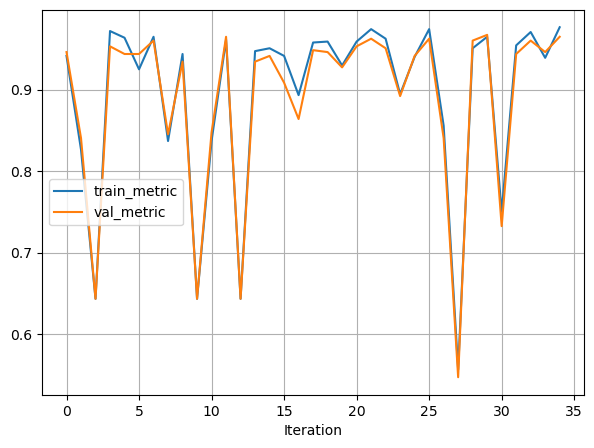

| 35        | 0.9648    | 0.0       | 0.0       | 14.92     | 0.278     | 4.431     | 3.201     | 0.005     | 50.0      | 1.0       |
CPU times: total: 17.9 s
Wall time: 44.8 s


In [49]:
%%time
optimizer.maximize(
    init_points=2,
    n_iter=30,
)

Se puede retomar la búsqueda si se desea

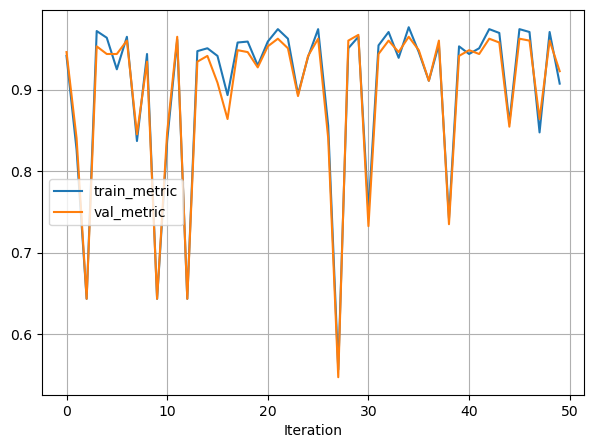

| 50        | 0.9225    | 0.0       | 0.0       | 11.87     | 1.0       | 5.333     | 3.174     | 0.005     | 50.0      | 0.2952    |
CPU times: total: 8.83 s
Wall time: 22.4 s


In [50]:
%%time
optimizer.maximize(
    n_iter=10,
)

Se obtienen luego los hiperparámetros óptimos:

In [51]:
optimizer.max

{'target': 0.9671361502347419,
 'params': {'imputer_class': 0.5869064888674455,
  'imputer_strategy': 0.16249479669261524,
  'knn_imputer_k': 13.975095637347755,
  'model_alpha': 0.6645031560523362,
  'model_batch_size': 5.022064288445209,
  'model_hidden_layer_size_exp': 3.0392782906300733,
  'model_lr_init': 0.09617060842609669,
  'model_max_iter': 50.0,
  'scaler_choice': 1.0}}

Obtenemos el mejor modelo

In [52]:
best_model, best_result = train_and_evaluate(**optimizer.max["params"], show_live_plot=False)

In [53]:
best_result

0.9671361502347419